In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

Read CSV

In [2]:
df = pd.read_csv('./AOD_PM_Bern.csv')
df.head()

,dates,AOD,PM2.5
0,7/1/2018,0.169333,16.9
1,7/2/2018,0.286667,14.6
2,7/3/2018,NaN,11.4
3,7/4/2018,0.185500,11.3
4,7/5/2018,NaN,9.1


We need to find the correlation values between AOD and PM2.5 for each month. First split data by months


In [10]:
df['dates_dt'] = pd.to_datetime(df.dates)
df['year'] = df.dates_dt.apply(lambda x: x.year)
df['month'] = df.dates_dt.apply(lambda x: x.month)
df['day'] = df.dates_dt.apply(lambda x: x.day)
df.head()
df.min()
df.max()

dates                  8/9/2018
AOD                    0.286667
PM2.5                      22.2
dates_dt    2018-08-31 00:00:00
year                       2018
month                         8
day                          31
dtype: object

Text(0.5, 0.98, 'Time Series of AOD and PM2.5 Data')

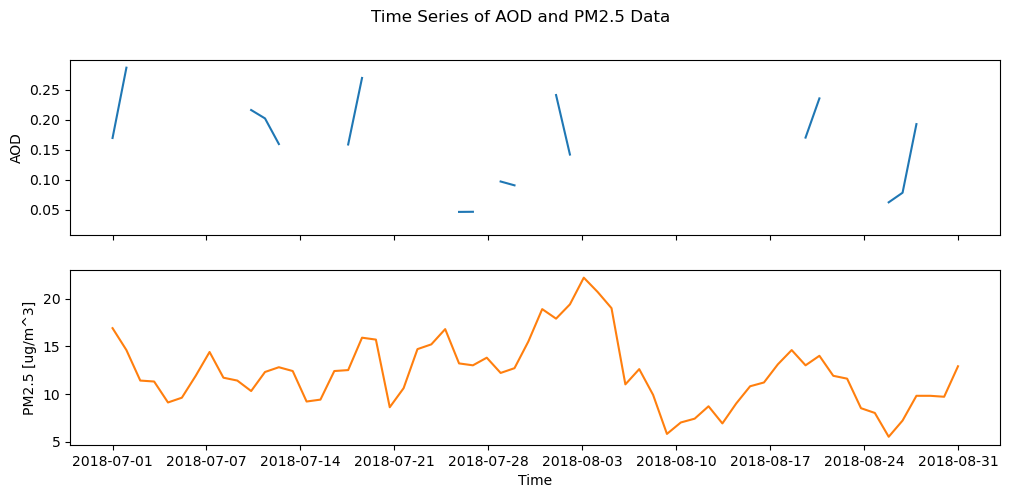

In [25]:
cmap = plt.get_cmap('tab10')

fig, ax = plt.subplots(2,1, figsize=(12,5), sharex=True)
ax[0].plot(df.dates_dt, df.AOD)
ax[1].plot(df.dates_dt, df['PM2.5'], color=cmap(1))
ax[1].set_xticks(ticks = pd.date_range(start=df.dates_dt.min(),
                  end=df.dates_dt.max(),
                  periods=10))
ax[1].set_xlabel('Time')
ax[0].set_ylabel('AOD')
ax[1].set_ylabel('PM2.5 [ug/m^3]')
fig.suptitle('Time Series of AOD and PM2.5 Data')

In [78]:
df1 = df.dropna()

X = df1.AOD.to_numpy()
y = df1['PM2.5'].to_numpy()

reg = LinearRegression().fit(X.reshape(len(X),1), y.reshape(len(y), 1))
score = reg.score(X.reshape(len(X),1),y.reshape(len(y), 1))
print(reg.coef_)
print(reg.intercept_)
print(score)

[[24.40731756]]
[8.71417464]
0.2699398552562551


Text(0.125, 6.5, 'R^2 = 0.2699')

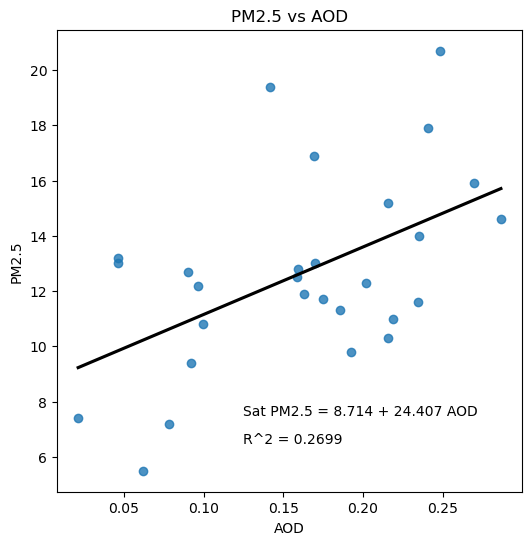

In [101]:


plt.figure(figsize=(6,6))
sns.regplot(y=df['PM2.5'], x=df.AOD, ci=None, line_kws = {"color": "black"})
plt.title('PM2.5 vs AOD')
plt.text(0.125, 7.5, 'Sat PM2.5 = ' + str(round(reg.intercept_[0],3)) + ' + ' + str(round(reg.coef_[0][0],3)) + ' AOD')
plt.text(0.125, 6.5, 'R^2 = '+ str(round(score,4)))


Start analysis on the fire data

In [83]:
df2 = pd.read_csv('./modis_2022_Italy.csv')
df2.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,45.5485,7.9118,305.7,1.4,1.2,2022-01-01,1003,Terra,MODIS,48,6.03,286.3,12.3,D,0
1,40.4346,17.3456,302.7,1.0,1.0,2022-01-01,1151,Aqua,MODIS,30,6.03,291.7,4.3,D,0
2,40.6532,16.9727,304.6,1.1,1.0,2022-01-01,1151,Aqua,MODIS,59,6.03,288.8,6.6,D,0
3,40.6502,16.8961,300.0,1.1,1.0,2022-01-01,1151,Aqua,MODIS,22,6.03,289.7,3.9,D,0
4,40.5230,17.3147,303.4,1.0,1.0,2022-01-01,1151,Aqua,MODIS,31,6.03,290.6,4.7,D,0


In [88]:
df2['acq_date_dt'] = pd.to_datetime(df2.acq_date)
df2['month'] = df2.acq_date_dt.apply(lambda x: x.month)
month_data = df2.groupby('month').agg('count').reset_index()

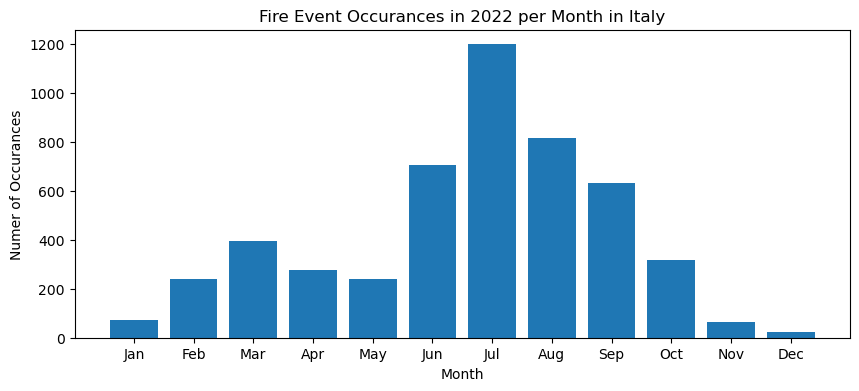

In [99]:
tickies = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10,4))
plt.title('Fire Event Occurances in 2022 per Month in Italy')
plt.bar(month_data.month, month_data.acq_date_dt)
plt.xticks(ticks=list(range(1,13,1)), labels=tickies)
plt.xlabel('Month')
plt.ylabel('Numer of Occurances')
plt.show()